In [16]:
import os
import random
import dill as pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from sklearn.metrics import confusion_matrix
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset, random_split

In [23]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
# %cd '/content/gdrive/MyDrive/CV/yolov5'

/content/gdrive/MyDrive/CV/yolov5


In [24]:
# !unzip yolov5.zip



In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
numclasses = 21
lr = 0.001
batch_size = 32
num_epochs = 20

In [ ]:
def img_transforms(im):
    im_tfs=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        transforms.Resize((224,224))
    ])
    im=im_tfs(im)
    # print(label)
    return im

In [ ]:
class Yolo(Dataset):
    def __init__(self, image_dir, label_dir, transform):
        self.image_names = []
        self.mask_names = []
        self.transform = transform
        self.isTrain = False
        for image_file in os.listdir(image_dir):
            self.image_names.append(os.path.join(image_dir, image_file))
        for label_file in os.listdir(label_dir):
            self.mask_names.append(os.path.join(label_dir, label_file))

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, index):
        labelList = []
        image  = self.image_names[index]
        mask = self.mask_names[index]
        image = cv2.imread(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = np.loadtxt(mask, dtype=np.float32)
        if len(label.shape) == 1:
            label = np.expand_dims(label, axis=0)
        classLabelList = []
        for i in range(len(label)):
            temp = []
            temp.append(label[i][0])
            temp.append(label[i][1])
            temp.append(label[i][2])
            temp.append(label[i][3])
            temp.append(label[i][4])
            classLabelList.append(temp[0])
            labelList.append(temp)
        image = self.transform(image)
        return image, labelList,classLabelList

In [ ]:
VOCData = Yolo('train/images', 'train/labels',img_transforms)

train_size = int(0.7* len(VOCData))
val_size = int(0.2* len(VOCData))
test_size = len(VOCData) - train_size - val_size
train_dataset, val_dataset,test_dataset = random_split(VOCData, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [ ]:
train_labels = []
test_labels = []
val_labels = []

for _,_,labels in iter(train_loader):
    train_labels.extend(labels)

for _,_,labels in iter(test_loader):
    test_labels.extend(labels)

for _,_,labels in iter(val_loader):
    val_labels.extend(labels)

In [ ]:
train_labels = [int(i) for i in train_labels]
test_labels = [int(i) for i in test_labels]
val_labels = [int(i) for i in val_labels]

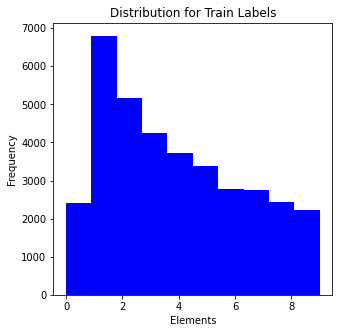

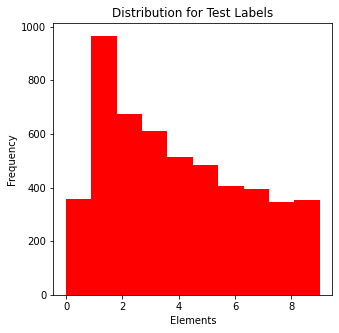

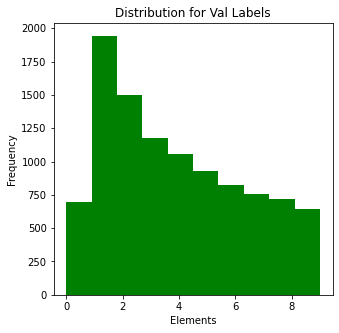

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(train_labels, bins=10, color='blue')
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.title('Distribution for Train Labels')
plt.show()

plt.figure(figsize=(5,5))
plt.hist(test_labels, bins=10, color='red')
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.title('Distribution for Test Labels')
plt.show()

plt.figure(figsize=(5,5))
plt.hist(val_labels, bins=10, color='green')
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.title('Distribution for Val Labels')
plt.show()



In [ ]:
! python train.py --img 320 --batch 32 --epochs 5 --data svhn.yaml --weights yolov5n.pt --project runs/train --name yolov5nQ3F --cache --patience 3

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: vibhor20349. Use `wandb login --relogin` to force relogin
train: weights=yolov5n.pt, cfg=, data=svhn.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=32, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5nQ3F, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=3, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2023-2-18 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (T

In [32]:
! python val.py --batch 15 --data svhn.yaml --weights /content/gdrive/MyDrive/CV/yolov5/runs/train/yolov5nQ3F/weights/best.pt --project runs/train --name yolovQ3F_Val

val: data=svhn.yaml, weights=['/content/gdrive/MyDrive/CV/yolov5/runs/train/yolov5nQ3F/weights/best.pt'], batch_size=15, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/train, name=yolovQ3F_Val, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2023-2-18 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 1772695 parameters, 0 gradients, 4.2 GFLOPs
val: Scanning /content/gdrive/MyDrive/CV/yolov5/val/labels.cache... 7014 images, 0 backgrounds, 0 corrupt: 100% 7014/7014 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 468/468 [01:11<00:00,  6.58it/s]
                   all       7014      15443      0.685      0.587      0.643      0.272
                     0       7014       1047       0.78       0.58      

In [ ]:
import albumentations as A
import cv2
import os
import random

# select random image sample of 1000 images from the dataset
imgList = os.listdir('train/images/')
imageList = random.sample(imgList, 500)

In [1]:
def doAugment(transform,prefix):
    for i in range(len(imageList)):
        # print(imageList[i])
        image = cv2.imread('train/images/' + imageList[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # strip any extra white space
        label = np.loadtxt('train/labels/' + imageList[i].split('.')[0] + '.txt')
        labelList = []
        for j in range(len(label)):
            if(len(label.shape)==1):
                label.expand_dims(label, axis=0)
                
            temp=[]
            temp.append(label[j][1])
            temp.append(label[j][2])
            temp.append(label[j][3])
            temp.append(label[j][4])
            temp.append(label[j][0])
            labelList.append(temp)
        transformed = transform(image=image, bboxes=labelList)
        transformed_image = transformed["image"]
        transformed_bboxes = transformed["bboxes"]
        
        with open('train/labels/' + prefix+imageList[i].split('.')[0] + '.txt', 'w') as f:
            for k in range(len(transformed_bboxes)):
                f.write(str(transformed_bboxes[k][4]) + ' ' + str(transformed_bboxes[k][0]) + ' ' + str(transformed_bboxes[k][1]) + ' ' + str(transformed_bboxes[k][2]) + ' ' + str(transformed_bboxes[k][3])+str('\n'))

        cv2.imwrite('train/images/' + prefix+imageList[i], transformed_image)


transformHF = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
],bbox_params=A.BboxParams(format='yolo',min_visibility=0.1,min_area=512))

transformSharpen = A.Compose([
    A.Sharpen(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
],bbox_params=A.BboxParams(format='yolo',min_visibility=0.1,min_area=512))

transformResize = A.Compose([
    A.Resize(320,320),
],bbox_params=A.BboxParams(format='yolo',min_visibility=0.1,min_area=512))

doAugment(transformHF,'HF_')
doAugment(transformSharpen,'SHARPEN_')
doAugment(transformResize,'RESIZE_')



